# ** Tensorflow Experiments **

We are going to learn what convolution is and we will apply it to images using tensorflow!
Everything in tensorflow takes place in a computational graph. We first define everything in the graph (no computing yet) and running and evaluating anything requires a session.

In [1]:
import tensorflow as tf

/Users/puabbott/Documents/cs231n/assignment1/cs231n-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [3]:
img = plt.imread('img.jpg')

In [4]:
print(img.shape)
print(type(img))

(2368, 3200, 3)
<class 'numpy.ndarray'>


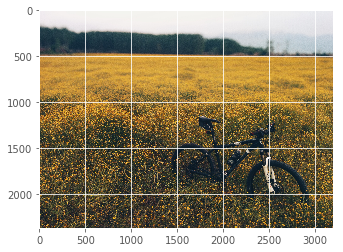

In [5]:
plt.imshow(img)
image = tf.cast(img, tf.float32)

In [6]:
flattened = img.ravel()
print(len(flattened))
print(flattened[:10])

22732800
[241 237 238 241 237 238 241 237 238 240]


### Visualize
Now let's visualize how these flattened out pixel values look like.

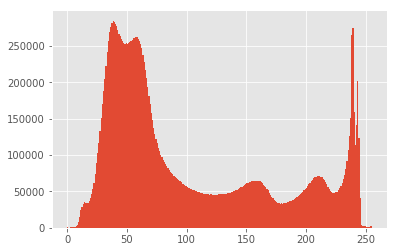

In [7]:
res = plt.hist(flattened.ravel(), 255)

In [8]:
# We can start a session in tf like this 
# sess = tf.Session()
# compute something like this 
# computed_x = sess.run(x)
# print(computed_x)
# and close it like this 
# sess.close()

# We can get the default graph by 
# g = tf.get_default_graph()
# and we can get all the operations put in the graph automatically by 
# [op.name for op in g.get_operations()]

# We will now setup an interactive session 
sess = tf.InteractiveSession()
x = tf.linspace(-3.0, 3.0, 90)
print(x.get_shape())

# We see that the shape is 1-dimensional as it's a list, hence you only get the length.

(90,)


### Let's make a kernel

We now make out first kernel, the gaussian kernel! 
The idea comes from a gaussian distribution which looks like this.


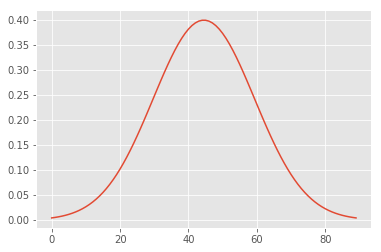

In [9]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
res = z.eval()
plt.plot(res)

We now try to convert this one dimensional Gaussion curve in to a 2-D Gaussian kernel.
We do this by multiplying a matrix by its transpose.

In [10]:
kernel_size = z.get_shape().as_list()[0]
print(kernel_size)

90


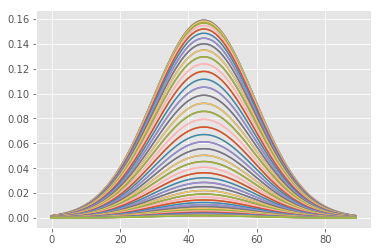

In [11]:
z_2d = tf.matmul(tf.reshape(z,[kernel_size,1]),tf.reshape(z,[1,kernel_size]))
res = plt.plot(z_2d.eval())

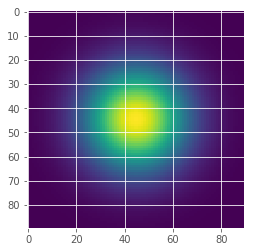

In [12]:
ans = plt.imshow(z_2d.eval())

## Convolution 
Now we're going to convolve our image with this gaussian filter which basically means we're going to look at the image through a lens of this filter. So this filter will look at chunks of the image and the by virtue of its nature it will give more weight(importance/value) to the center pixels of the chunk and decreasing importance/weight to the side pixels as visible in the graph. After this, it returns with one value which we will replace at that place.

In [13]:
img_4d = tf.reshape(image,[1,img.shape[0],img.shape[1],3])
print(img_4d)

Tensor("Reshape_2:0", shape=(1, 2368, 3200, 3), dtype=float32)


We'll also have to reshape our Gaussian Kernel to be 4-dimensional as well. The dimensions for kernels are slightly different!

Remember that the image is:

Number of Images x Image Height x Image Width x Number of Channels

we have:

**Kernel Height** x **Kernel Width** x **Number of Input Channels** x **Number of Output Channels**

In [14]:
print("Old shape: " ,z_2d.shape.as_list())
#z_2d.shape.as_list()[0],z_2d.shape.as_list()[1]
z_4d = tf.reshape(z_2d,[30,-1,3,3])
print("New shape: ", z_4d.shape.as_list())

Old shape:  [90, 90]
New shape:  [30, 30, 3, 3]


In [ ]:
# Convolving our image
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)